# Graph Visualizer For Algorithms using CSV File

In [1]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch
from matplotlib.lines import Line2D

In [2]:
# Import Data from CSV file
dataset = pd.read_csv(
    './../data/sample_FCFS_SJF_Comparison.csv', 
    sep=r'\s*,\s*', 
    header=0, 
    encoding='ascii', 
    engine='python'
)

print(dataset)


          name  #cases  avgTAT  avgWT  nCS
0  mDRRHA-fcfs       8    27.0    5.5   29
1   mDRRHA-sjf       8    20.0    4.5   20
2  mDRRHA-fcfs      10    27.0    5.5   29
3   mDRRHA-sjf      10    20.0    4.5   20
4  mDRRHA-fcfs       7    27.0    5.5   29
5   mDRRHA-sjf       7    20.0    4.5   20
6  mDRRHA-fcfs       7    27.0    5.5   29
7   mDRRHA-sjf       7    20.0    4.5   20
8  mDRRHA-fcfs       7    27.0    5.5   29
9   mDRRHA-sjf       7    20.0    4.5   20


In [5]:
MDRRHA_SJS_FCFS = 0
ALGO_COMPARISONS_ATAT_BAR = 1
ALGO_COMPARISONS_ATAT_LINE = 2
ALGO_COMPARISONS_WT_BAR = 3
ALGO_COMPARISONS_WT_LINE = 4

<Figure size 432x288 with 0 Axes>

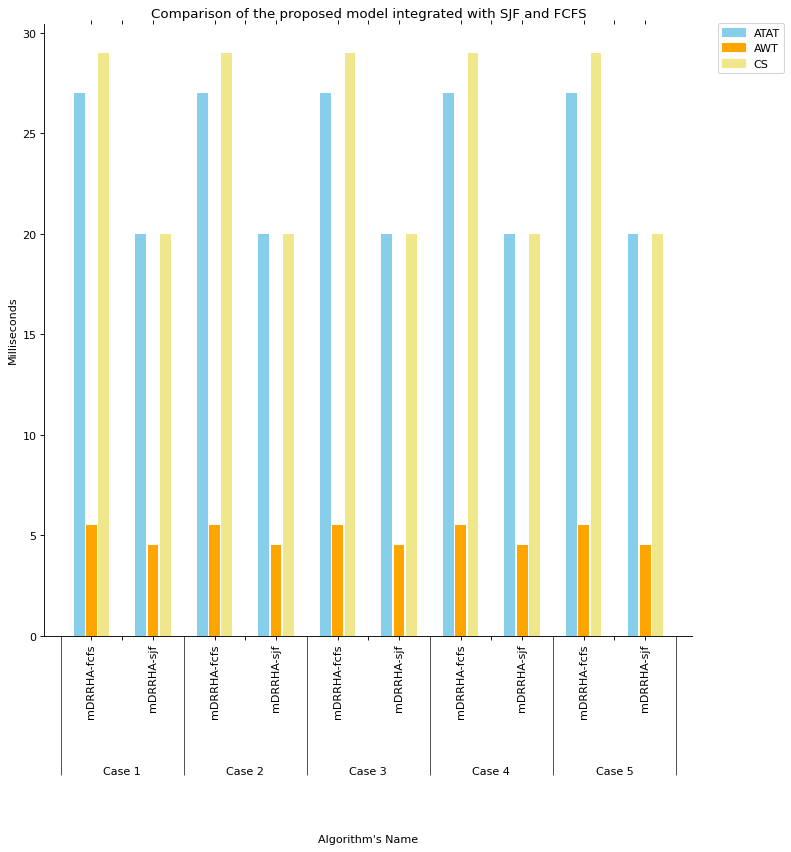

In [5]:
# Comparison of mDRRHA with SJF and FCFS

# Graph Configurations 
plt.figure(MDRRHA_SJS_FCFS)
fig = plt.figure(figsize = (9, 9), dpi = 80)
ax = fig.add_axes([.05, .1, .9, .85])

X = dataset['name'].to_numpy()
X_labels = []
X_axis = []
X_axis_lines = [0]
X_axis_bars = []

current_case_index = 1
push_empty = False

counter = 1
for i in range(len(X)):
    X_labels = np.append(X_labels, X[i])
    X_axis.append(counter)
    X_axis_bars.append(counter)

    counter += 1
    if push_empty:
        push_empty = False
        X_axis_lines.append(counter)
        counter += 1

    if i % 2 == 0:
        X_labels = np.append(X_labels, 'Case ' + str(current_case_index))
        current_case_index += 1
        X_axis.append(counter)
        counter += 1
        push_empty = True

ax.set_xticks(X_axis)
ax.set_xticks(X_axis_lines, minor = True)
ax.set_xticklabels(X_labels)

# vertical alignment of xtick labels
minor_axis_padding_up = -0.2
vertical_align = []
for i in range(0, len(X_labels)):
    valueToPush = 0
    if i % 3 == 1:
        valueToPush = minor_axis_padding_up      

    vertical_align.append(valueToPush)

# Adding Lines to xTicks
line_width = 0.025
line_height = 125

for i, (t, y) in enumerate(zip(ax.get_xticklabels(), vertical_align)):
    if i % 3 == 0 or i % 3 == 2:
        t.set_rotation(90)

    t.set_y(y)


ax.tick_params( axis='x', which='minor', direction='out', length=line_height )
ax.tick_params( axis='x', which='major', bottom='off', top='off' )

bar_width = 0.35
padding_betweenbars = 0.05

avgTAT_color = 'skyblue'
avgWT_color = 'orange'
nCS_color = 'khaki'

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Plotting Bars
current_bar_index = 0
for index, x_axis in enumerate(X_axis_bars):
    ax.bar(
        x_axis - bar_width - padding_betweenbars, 
        dataset['avgTAT'][current_bar_index], 
        bar_width, 
        label = 'ATAT',
        color = avgTAT_color
    )

    ax.bar(
        x_axis, 
        dataset['avgWT'][current_bar_index], 
        bar_width, 
        label = 'AWT',
        color = avgWT_color
    )

    ax.bar(
        x_axis + bar_width + padding_betweenbars, 
        dataset['nCS'][current_bar_index], 
        bar_width, 
        label = 'CS',
        color = nCS_color
    )

    current_bar_index += 1

# Configuring Legend
legend_elements = [
    Patch(facecolor=avgTAT_color, edgecolor=avgTAT_color, label='ATAT'),
    Patch(facecolor=avgWT_color, edgecolor=avgWT_color, label='AWT'),
    Patch(facecolor=nCS_color, edgecolor=nCS_color, label='CS')
]

ax.legend(
    handles = legend_elements, 
    loc = 'upper right',
    bbox_to_anchor=(1.15, 1.01)
)

plt.xlabel('Algorithm\'s Name', labelpad = 50)
plt.ylabel('Milliseconds')
plt.title('Comparison of the proposed model integrated with SJF and FCFS')
# plt.legend()
plt.show()


In [15]:
# Import Data from CSV file
dataset = pd.read_csv(
    './../data/sample_output.csv', 
    sep=r'\s*,\s*', 
    header=0, 
    encoding='ascii', 
    engine='python'
)

dataset = dataset.sort_values(by = ['#cases', 'name'])


In [16]:
print(dataset)

      name  #cases     avgTAT      avgWT  nCS
1    DRRHA      10  24.500000   8.000000   20
0       RR      10  31.000000   1.500000   18
3      SJF      10  23.000000   9.500000   27
2   mDRRHA      10  27.000000   5.500000   29
5    DRRHA      50  24.500000   8.000000   20
4       RR      50  31.000000   1.500000   18
7      SJF      50  23.000000   9.500000   27
6   mDRRHA      50  27.000000   5.500000   29
9    DRRHA     100  24.500000   8.000000   20
8       RR     100  31.000000   1.500000   18
11     SJF     100  23.000000   9.500000   27
10  mDRRHA     100  27.000000   5.500000   29
13   DRRHA     150  24.500000   8.000000   20
12      RR     150  23.555555  19.111111   16
15     SJF     150  23.000000   9.500000   27
14  mDRRHA     150  27.000000   5.500000   29


[ 10  50 100 150]
[1, 3, 5, 7]
[0, 2, 4, 6, 8]


<Figure size 432x288 with 0 Axes>

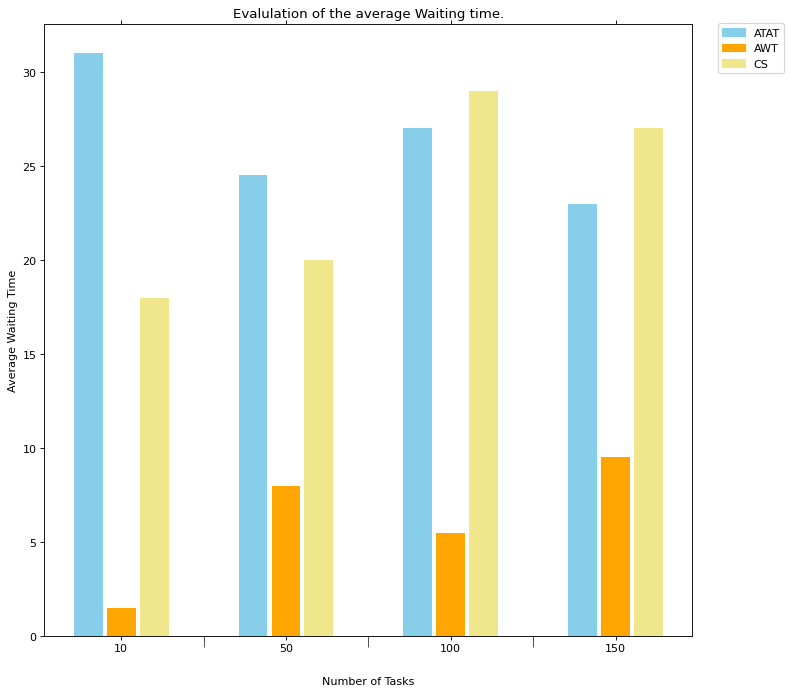

In [48]:
# Comparison of Algos Average Waiting Time and Number of Tasks

# Graph Configurations 
plt.figure(ALGO_COMPARISONS_WT_BAR)
fig = plt.figure(figsize = (9, 9), dpi = 80)
ax = fig.add_axes([.05, .1, .9, .85])

X = dataset['#cases'].unique()
X_labels = []
X_axis = []
X_axis_lines = [0]
X_axis_bars = []

current_case_index = 1
push_empty = False

counter = 1
for i in range(len(X)):
    X_labels = np.append(X_labels, X[i])
    X_axis.append(counter)
    X_axis_bars.append(counter)
    counter += 1

    X_axis_lines.append(counter)
    counter += 1

X_labels = X_labels.astype(int)
print(X_labels)
print(X_axis)
print(X_axis_lines)

ax.set_xticks(X_axis)
ax.set_xticks(X_axis_lines, minor = True)
ax.set_xticklabels(X_labels)

# Adding Lines to xTicks
line_width = 0.025
line_height = 10

ax.tick_params( axis='x', which='minor', direction='out', length=line_height )
ax.tick_params( axis='x', which='major', bottom='off', top='off' )

bar_width = 0.35
padding_betweenbars = 0.05

avgTAT_color = 'skyblue'
avgWT_color = 'orange'
nCS_color = 'khaki'

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Plotting Bars
current_bar_index = 0
for index, x_axis in enumerate(X_axis_bars):
    ax.bar(
        x_axis - bar_width - padding_betweenbars, 
        dataset['avgTAT'][current_bar_index], 
        bar_width, 
        label = 'ATAT',
        color = avgTAT_color
    )

    ax.bar(
        x_axis, 
        dataset['avgWT'][current_bar_index], 
        bar_width, 
        label = 'AWT',
        color = avgWT_color
    )

    ax.bar(
        x_axis + bar_width + padding_betweenbars, 
        dataset['nCS'][current_bar_index], 
        bar_width, 
        label = 'CS',
        color = nCS_color
    )

    current_bar_index += 1

# Configuring Legend
legend_elements = [
    Patch(facecolor=avgTAT_color, edgecolor=avgTAT_color, label='ATAT'),
    Patch(facecolor=avgWT_color, edgecolor=avgWT_color, label='AWT'),
    Patch(facecolor=nCS_color, edgecolor=nCS_color, label='CS')
]

ax.legend(
    handles = legend_elements, 
    loc = 'upper right',
    bbox_to_anchor=(1.15, 1.01)
)

plt.xlabel('Number of Tasks', labelpad = 20)
plt.ylabel('Average Waiting Time')
plt.title('Evalulation of the average Waiting time.')
# plt.legend()
plt.show()
